In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
data = pd.read_csv("data_cleaned.csv")
data.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,0.818182,0.163647,1.0,0.0,0.5,0.0,0.5,0.0,0
1,0.454545,0.435262,1.0,1.0,0.0,1.0,1.0,1.0,0
2,0.545455,0.219253,0.0,1.0,0.5,1.0,1.0,0.0,0
3,0.727273,0.939882,1.0,0.0,0.0,1.0,1.0,0.5,0
4,0.090909,0.022339,1.0,0.0,1.0,0.0,1.0,0.0,0


# KNN

## 3.1 -  Filter : Information Gain

In [3]:
X = data.drop("conversion", axis=1)
y = data["conversion"]

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score, recall_score, classification_report
from sklearn.feature_selection import mutual_info_classif

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
def informationGain(data):
    X = data.drop("conversion", axis=1)
    y = data["conversion"]

    importances = mutual_info_classif(X, y)
    features_importance = pd.Series(importances, X.columns)
    features_importance = features_importance.sort_values()
    
    return features_importance

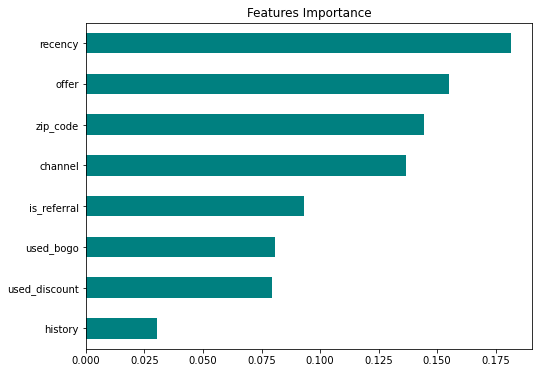

20% des features
['recency', 'offer']
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Accuracy : 0.7979758692635945
Precision : 1.0
recall : 0.5959459098678523
f1 : 0.7089569375257606
----- TEST ------


,precision,recall,f1-score,support
0,0.718112,0.962742,0.822625,15567.000000
1,0.942964,0.619765,0.747943,15472.000000
accuracy,0.791778,0.791778,0.791778,0.791778
macro avg,0.830538,0.791253,0.785284,31039.000000
weighted avg,0.830194,0.791778,0.785398,31039.000000




40% des features
['recency', 'offer', 'zip_code']
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Accuracy : 0.8443989820009061
Precision : 1.0
recall : 0.6887912330214251
f1 : 0.7715702686258796
----- TEST ------


,precision,recall,f1-score,support
0,0.761416,0.966328,0.851721,15443.000000
1,0.954545,0.700180,0.807812,15596.000000
accuracy,0.832598,0.832598,0.832598,0.832598
macro avg,0.857981,0.833254,0.829766,31039.000000
weighted avg,0.858457,0.832598,0.829658,31039.000000




50% des features
['recency', 'offer', 'zip_code', 'channel']
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Accuracy : 0.8590807824556668
Precision : 0.9784726310627063
recall : 0.7378332522591159
f1 : 0.7922371703839692
----- TEST ------


,precision,recall,f1-score,support
0,0.793251,0.922243,0.852897,15497.000000
1,0.907464,0.760327,0.827405,15542.000000
accuracy,0.841168,0.841168,0.841168,0.841168
macro avg,0.850358,0.841285,0.840151,31039.000000
weighted avg,0.850440,0.841168,0.840133,31039.000000




70% des features
['recency', 'offer', 'zip_code', 'channel', 'is_referral', 'used_bogo']
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Accuracy : 0.8594577444047795
Precision : 0.9779363792983442
recall : 0.7388384922187153
f1 : 0.792977136683145
----- TEST ------


,precision,recall,f1-score,support
0,0.788744,0.960044,0.866004,15517.000000
1,0.948980,0.742945,0.833418,15522.000000
accuracy,0.851477,0.851477,0.851477,0.851477
macro avg,0.868862,0.851495,0.849711,31039.000000
weighted avg,0.868874,0.851477,0.849708,31039.000000


In [8]:
features_importance = informationGain(data)
plt.figure(figsize=(8, 6))
features_importance.plot(kind="barh", color="teal", title="Features Importance")
plt.show()

for percent in [20, 40, 50, 70]:
    
    features = list(features_importance.index)[::-1]
    n = round((percent * len(features))/100)
    features = features[:n]
    
    X = data[features]
    y = data["conversion"]
    
    grid_param = {
        'n_neighbors': list(range(2,10)),
        'weights' : ['uniform', 'distance'],
        'metric' : ['euclidean', 'manhattan', 'minkowski']
    } 
    
    print("{}% des features".format(percent))
    print(features)
    
    model = KNeighborsClassifier()
    grid = GridSearchCV(model, grid_param, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search=grid.fit(X, y)
    
    model = grid.best_estimator_
    
    acc = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    f1 = cross_val_score(model, X, y, cv=5, scoring='f1').mean()
    precision = cross_val_score(model, X, y, cv=5, scoring='precision').mean()
    recall = cross_val_score(model, X, y, cv=5, scoring='recall').mean()

    print("Accuracy : {}".format(acc))
    print("Precision : {}".format(precision))
    print("recall : {}".format(recall))
    print("f1 : {}".format(f1))

    model = grid.best_estimator_
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    print("----- TEST ------")
    report = classification_report(y_test,y_pred_test, output_dict=True)
    test_report = pd.DataFrame(report).transpose()
    display(test_report)

    print("\n")

## 3.2. Filter : Variance threshold

In [9]:
X = data.drop("conversion", axis=1)
y = data["conversion"]

In [10]:
from sklearn.feature_selection import VarianceThreshold 

In [11]:
v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(X)
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

## 3.3. Wrapper : Exhaustive feature selection

In [12]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [13]:
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=2, weights='distance')

efs = EFS(estimator=knn, min_features=1, max_features=8, scoring='accuracy', cv=5)
efs = efs.fit(X, y)

print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (corresponding names):', efs.best_feature_names_)

Features: 255/255

Best accuracy score: 0.86
Best subset (corresponding names): ('recency', 'zip_code', 'is_referral', 'channel', 'offer')


In [14]:
X_new = efs.transform(X)
print('Number of features before transformation: {}'.format(X.shape[1]))
print('Number of features after transformation: {}'.format(X_new.shape[1]))

Number of features before transformation: 8
Number of features after transformation: 5


In [15]:
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=False, inplace=True)
efs_results.head(10)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
196,"(0, 4, 5, 6, 7)","[0.5725124438215822, 0.9343739428792345, 0.936...",0.863759,"(recency, zip_code, is_referral, channel, offer)",0.187176,0.14563,0.072815
216,"(2, 4, 5, 6, 7)","[0.57140095684531, 0.9395930991156429, 0.93847...",0.863517,"(used_discount, zip_code, is_referral, channel...",0.187752,0.146077,0.073039
189,"(0, 2, 4, 5, 7)","[0.5710626782003576, 0.9336490600686222, 0.932...",0.862261,"(recency, used_discount, zip_code, is_referral...",0.187159,0.145616,0.072808
193,"(0, 3, 4, 5, 7)","[0.5708693761175276, 0.9318126902817377, 0.935...",0.861787,"(recency, used_bogo, zip_code, is_referral, of...",0.186972,0.14547,0.072735
245,"(2, 3, 4, 5, 6, 7)","[0.5721741651766298, 0.9408495626540376, 0.925...",0.861487,"(used_discount, used_bogo, zip_code, is_referr...",0.186043,0.144748,0.072374
192,"(0, 3, 4, 5, 6)","[0.571304305803895, 0.9292031121635336, 0.9320...",0.859796,"(recency, used_bogo, zip_code, is_referral, ch...",0.185409,0.144255,0.072127
217,"(3, 4, 5, 6, 7)","[0.5713526313246026, 0.9252404194655197, 0.925...",0.859419,"(used_bogo, zip_code, is_referral, channel, of...",0.185265,0.144142,0.072071
190,"(0, 2, 4, 6, 7)","[0.5713526313246026, 0.929444739767071, 0.9313...",0.859284,"(recency, used_discount, zip_code, channel, of...",0.185042,0.143969,0.071985
194,"(0, 3, 4, 6, 7)","[0.571690909969555, 0.9325858986130575, 0.9294...",0.858578,"(recency, used_bogo, zip_code, channel, offer)",0.184374,0.143449,0.071724
125,"(0, 4, 6, 7)","[0.5714492823660174, 0.9262069298796695, 0.928...",0.858549,"(recency, zip_code, channel, offer)",0.184542,0.14358,0.07179


In [25]:
X = data[["recency", "zip_code", "is_referral","channel", "offer"]]
y = data["conversion"]


model = KNeighborsClassifier()
grid = GridSearchCV(model, grid_param, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search=grid.fit(X, y)

model = grid.best_estimator_

acc = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
f1 = cross_val_score(model, X, y, cv=5, scoring='f1').mean()
precision = cross_val_score(model, X, y, cv=5, scoring='precision').mean()
recall = cross_val_score(model, X, y, cv=5, scoring='recall').mean()

print("Accuracy : {}".format(acc))
print("Precision : {}".format(precision))
print("recall : {}".format(recall))
print("f1 : {}".format(f1))

model = grid.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
print("----- TEST ------")
report = classification_report(y_test,y_pred_test, output_dict=True)
test_report = pd.DataFrame(report).transpose()
display(test_report)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Accuracy : 0.8637588740925313
Precision : 0.9772481124098205
recall : 0.7486005080501494
f1 : 0.7979543258269677
----- TEST ------


,precision,recall,f1-score,support
0,0.791201,0.971094,0.871966,15464.000000
1,0.962932,0.745554,0.840414,15575.000000
accuracy,0.857921,0.857921,0.857921,0.857921
macro avg,0.877067,0.858324,0.856190,31039.000000
weighted avg,0.877374,0.857921,0.856134,31039.000000


In [16]:
efs_results = efs_results[["feature_names", "avg_score"]].head(6)
efs_results.to_excel('features-selection-wrapper.xlsx', index=False, engine='xlsxwriter') 

# Decision Trees

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
X = data.drop("conversion", axis=1)
y = data["conversion"]

## Default

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


model = DecisionTreeClassifier()

acc = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
f1 = cross_val_score(model, X, y, cv=5, scoring='f1').mean()
precision = cross_val_score(model, X, y, cv=5, scoring='precision').mean()
recall = cross_val_score(model, X, y, cv=5, scoring='recall').mean()

print("Accuracy : {}".format(acc))
print("Precision : {}".format(precision))
print("recall : {}".format(recall))
print("f1 : {}".format(f1))

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
print("----- TEST ------")

report = classification_report(y_test,y_pred_test, output_dict=True)
test_report = pd.DataFrame(report).transpose()
display(test_report)

Accuracy : 0.8483613925742871
Precision : 0.8632995033569311
recall : 0.8375415289343785
f1 : 0.8148858586560392
----- TEST ------


,precision,recall,f1-score,support
0,0.846361,0.852439,0.849389,15458.000000
1,0.852553,0.846480,0.849506,15581.000000
accuracy,0.849447,0.849447,0.849447,0.849447
macro avg,0.849457,0.849459,0.849447,31039.000000
weighted avg,0.849470,0.849447,0.849448,31039.000000


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [21]:
DT = DecisionTreeClassifier()
cross_val_score(DT, X, y, cv=5).mean()

0.8489413161052463

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
DT = DecisionTreeClassifier()
params = {
    'max_depth': [25, 50, 60, 70, 80, 90, 100],
    'min_samples_leaf': [2, 4, 8, 10, 12, 15, 20],
    'criterion': ["gini", "entropy"],
    
}

grid = GridSearchCV(DT, params, cv = 5, scoring = 'accuracy', verbose=1, n_jobs=-1)
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 98 candidates, totalling 490 fits
0.8655273503997002
{'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=2)


In [24]:
model = grid.best_estimator_
acc = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
f1 = cross_val_score(model, X, y, cv=5, scoring='f1').mean()
precision = cross_val_score(model, X, y, cv=5, scoring='precision').mean()
recall = cross_val_score(model, X, y, cv=5, scoring='recall').mean()

print("Accuracy : {}".format(acc))
print("Precision : {}".format(precision))
print("recall : {}".format(recall))
print("f1 : {}".format(f1))

Accuracy : 0.8656046707657383
Precision : 0.9019338050204724
recall : 0.81967985595375
f1 : 0.8238462762713237
